# Carregando o dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('/content/UCMF_FINAL.csv')

print(df.shape)
df.head()

(8043, 18)


,Peso,Altura,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,NORMAL X ANORMAL,B2,SOPRO,FC,HDA 1,MOTIVO1,MOTIVO2,SEXO_F,SEXO_Indeterminado,SEXO_M
0,39.5,142.000000,20.0,9.60,0,85,50,2,1,1,0,90,1,2,4,0,0,1
1,26.0,112.000000,21.0,4.40,0,100,60,2,1,2,0,100,5,3,0,0,0,1
2,28.0,117.000000,20.0,5.89,0,110,65,4,1,1,0,80,5,2,3,1,0,0
3,24.5,122.000000,16.0,6.24,0,100,65,2,1,1,1,88,5,2,3,0,0,1
4,42.0,150.674161,18.5,15.50,0,100,60,1,0,1,0,52,5,3,0,0,0,1


# Árvore de Decisão

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Definir a variável target
y = df['NORMAL X ANORMAL']

# Definir as features (removendo a coluna target)
X = df.drop('NORMAL X ANORMAL', axis=1)


In [ ]:
# Dividir os dados em 70% treino e 30% teste, mantendo a proporção das classes
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y  # Mantém a proporção das classes
)


In [ ]:
# Instanciar o classificador com hiperparâmetros padrão
clf = DecisionTreeClassifier(random_state=42)

# Treinar o modelo
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
# Fazer previsões no conjunto de teste
y_pred_dt = clf.predict(X_test)

# Relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_dt))

# Matriz de confusão
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_dt))

# Acurácia
print(f"Acurácia do modelo: {accuracy_score(y_test, y_pred_dt):.2%}")



Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1561
           1       0.80      0.81      0.80       852

    accuracy                           0.86      2413
   macro avg       0.85      0.85      0.85      2413
weighted avg       0.86      0.86      0.86      2413

Matriz de Confusão:
[[1388  173]
 [ 164  688]]
Acurácia do modelo: 86.03%


In [ ]:
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
accuracy_dt = accuracy_score(y_test, y_pred_dt)

In [ ]:
# Criar o dicionário com as métricas
scores_dt = {
    'Precisão': precision_dt,
    'Revocação': recall_dt,
    'F1-Score': f1_dt,
    'Acurácia': accuracy_dt
}

# Exibir o dicionário formatado
print("Métricas do Modelo de Árvore de Decisão:")
for metric, value in scores_dt.items():
    print(f"{metric}: {value:.4f}")


Métricas do Modelo de Árvore de Decisão:
Precisão: 0.8607
Revocação: 0.8603
F1-Score: 0.8605
Acurácia: 0.8603


In [ ]:


# Converter o dicionário em um DataFrame
metrics_df = pd.DataFrame(list(scores_dt.items()), columns=['Métrica', 'Valor'])


<ipython-input-33-389e502ce08f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Métrica', y='Valor', data=metrics_df, palette='Blues_d')


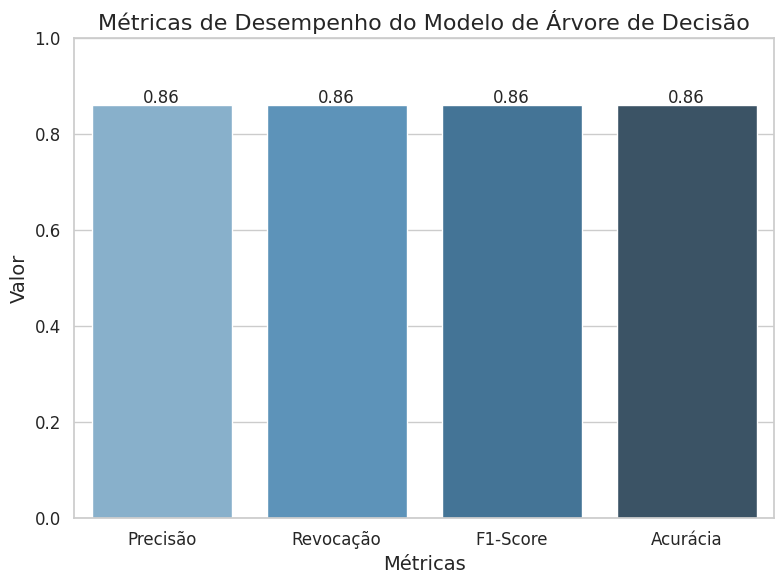

In [ ]:
# Configurar o estilo do seaborn
sns.set(style="whitegrid")

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x='Métrica', y='Valor', data=metrics_df, palette='Blues_d')

# Adicionar rótulos de valor acima de cada barra
for index, row in metrics_df.iterrows():
    plt.text(index, row['Valor'] + 0.005, f"{row['Valor']:.2f}", ha='center', fontsize=12)

# Configurar os limites do eixo y
plt.ylim(0, 1)

# Adicionar títulos e rótulos
plt.title('Métricas de Desempenho do Modelo de Árvore de Decisão', fontsize=16)
plt.xlabel('Métricas', fontsize=14)
plt.ylabel('Valor', fontsize=14)

# Ajustar a visualização
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Exibir o gráfico
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

# Avaliar o modelo usando validação cruzada de 5 folds
cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

# Imprimir a acurácia média e o desvio padrão
print(f"Acurácia média em cross-validation: {cv_scores.mean():.2%} (+/- {cv_scores.std() * 2:.2%})")


Acurácia média em cross-validation: 86.86% (+/- 1.37%)


In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir os hiperparâmetros para teste
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instanciar o GridSearchCV
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Realizar o ajuste dos hiperparâmetros
grid_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_clf = grid_search.best_estimator_

# Imprimir os melhores hiperparâmetros
print("Melhores hiperparâmetros encontrados:")
print(grid_search.best_params_)


Melhores hiperparâmetros encontrados:
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [ ]:
# Prever os resultados para o conjunto de teste com o melhor modelo
y_pred_best = best_clf.predict(X_test)

# Imprimir o relatório de classificação
print("\nRelatório de Classificação com o Modelo Otimizado:")
print(classification_report(y_test, y_pred_best))

# Imprimir a matriz de confusão
print("Matriz de Confusão do Modelo Otimizado:")
print(confusion_matrix(y_test, y_pred_best))

# Calcular e imprimir a acurácia
print(f"Acurácia do modelo otimizado: {accuracy_score(y_test, y_pred_best):.2%}")



Relatório de Classificação com o Modelo Otimizado:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1561
           1       0.97      0.84      0.90       852

    accuracy                           0.93      2413
   macro avg       0.94      0.91      0.92      2413
weighted avg       0.94      0.93      0.93      2413

Matriz de Confusão do Modelo Otimizado:
[[1535   26]
 [ 135  717]]
Acurácia do modelo otimizado: 93.33%


Métricas do Modelo Otimizado:
Precisão: 0.9353
Revocação: 0.9333
F1-Score: 0.9321
Acurácia: 0.9333


<ipython-input-37-df0205e9b425>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Métrica', y='Valor', data=metrics_df_best, palette='Oranges_d')


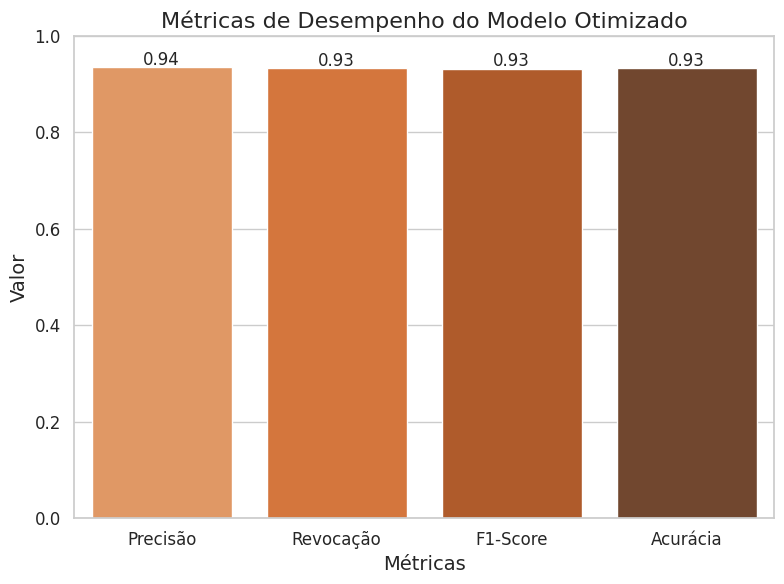

In [ ]:
# Passo 1: Calcular as métricas
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')
f1_best = f1_score(y_test, y_pred_best, average='weighted')
accuracy_best = accuracy_score(y_test, y_pred_best)

# Passo 2: Criar o dicionário com as métricas
scores_best = {
    'Precisão': precision_best,
    'Revocação': recall_best,
    'F1-Score': f1_best,
    'Acurácia': accuracy_best
}

print("Métricas do Modelo Otimizado:")
for metric, value in scores_best.items():
    print(f"{metric}: {value:.4f}")

# Passo 3: Plotar o gráfico
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

metrics_df_best = pd.DataFrame(list(scores_best.items()), columns=['Métrica', 'Valor'])

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='Métrica', y='Valor', data=metrics_df_best, palette='Oranges_d')

for index, row in metrics_df_best.iterrows():
    plt.text(index, row['Valor'] + 0.005, f"{row['Valor']:.2f}", ha='center', fontsize=12)

plt.ylim(0, 1)
plt.title('Métricas de Desempenho do Modelo Otimizado', fontsize=16)
plt.xlabel('Métricas', fontsize=14)
plt.ylabel('Valor', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:

# Criar um DataFrame com as métricas de ambos os modelos
metrics_df_comparison = pd.DataFrame({
    'Métrica': ['Precisão', 'Revocação', 'F1-Score', 'Acurácia'],
    'Modelo Original': list(scores_dt.values()),
    'Modelo Otimizado': list(scores_best.values())
})

# Transformar o DataFrame para formato longo
metrics_df_long = metrics_df_comparison.melt(id_vars='Métrica', var_name='Modelo', value_name='Valor')


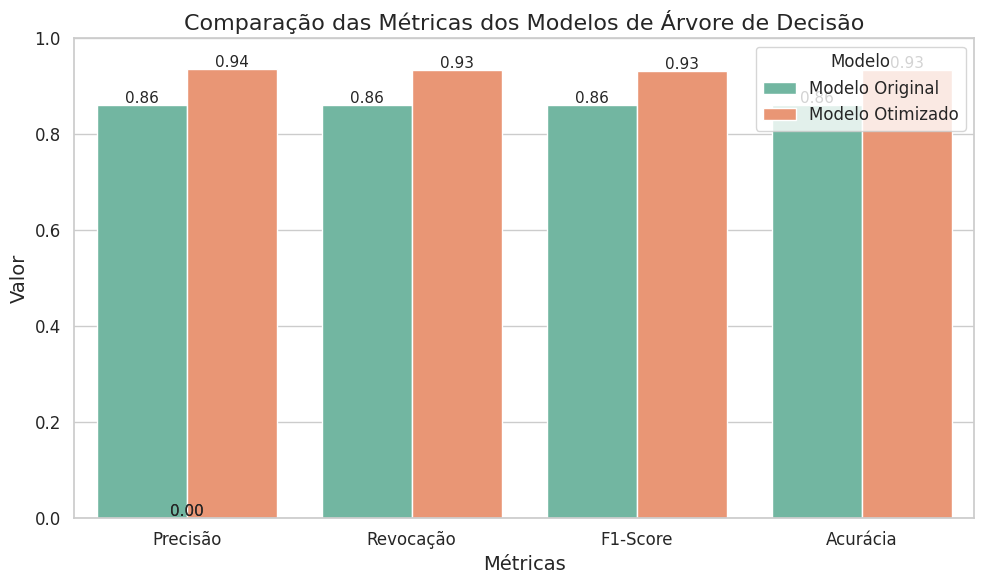

In [ ]:
# Plotar o gráfico comparativo
plt.figure(figsize=(10, 6))
sns.barplot(x='Métrica', y='Valor', hue='Modelo', data=metrics_df_long, palette='Set2')

# Adicionar rótulos de valor acima de cada barra
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2., p.get_height() + 0.005, f'{p.get_height():.2f}', ha='center', fontsize=11)

plt.ylim(0, 1)
plt.title('Comparação das Métricas dos Modelos de Árvore de Decisão', fontsize=16)
plt.xlabel('Métricas', fontsize=14)
plt.ylabel('Valor', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Modelo', fontsize=12)
plt.tight_layout()
plt.show()


# Random Forest

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt


In [ ]:
# Definir a variável target
y = df['NORMAL X ANORMAL']

# Definir as features (removendo a coluna target)
X = df.drop('NORMAL X ANORMAL', axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y  # Mantém a proporção das classes
)


In [ ]:
# Instanciar o classificador com hiperparâmetros padrão
rf_clf = RandomForestClassifier(random_state=42)

# Treinar o modelo
rf_clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Previsões do modelo Random Forest
y_pred_rf = rf_clf.predict(X_test)

# Calcular as métricas do Random Forest
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
accuracy_rf = accuracy_score(y_test, y_pred_rf)


In [ ]:
print("Métricas Gerais do Random Forest:")
print(f"Precisão: {precision_rf:.4f}")
print(f"Revocação: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print(f"Acurácia: {accuracy_rf:.4f}")

Métricas Gerais do Random Forest:
Precisão: 0.9336
Revocação: 0.9312
F1-Score: 0.9299
Acurácia: 0.9312


In [ ]:
# Fazer previsões no conjunto de teste
#y_pred = rf_clf.predict(X_test)
#
## Avaliar o desempenho do modelo
#print("Relatório de Classificação:")
#print(classification_report(y_test, y_pred))
#
#print("Matriz de Confusão:")
#print(confusion_matrix(y_test, y_pred))
#
#print(f"Acurácia do modelo: {accuracy_score(y_test, y_pred):.2%}")




In [ ]:
# Dicionário de métricas do Modelo Original de Árvore de Decisão
scores_dt = {
    'Precisão': precision_dt,
    'Revocação': recall_dt,
    'F1-Score': f1_dt,
    'Acurácia': accuracy_dt
}

# Dicionário de métricas do Modelo Otimizado de Árvore de Decisão
scores_dt_opt = {
    'Precisão': precision_best,
    'Revocação': recall_best,
    'F1-Score': f1_best,
    'Acurácia': accuracy_best
}

# Dicionário de métricas do Random Forest
scores_rf = {
    'Precisão': precision_rf,
    'Revocação': recall_rf,
    'F1-Score': f1_rf,
    'Acurácia': accuracy_rf
}


In [ ]:
import pandas as pd

# Criar o DataFrame com as métricas de todos os modelos
metrics_data = {
    'Métrica': ['Precisão', 'Revocação', 'F1-Score', 'Acurácia'],
    'Árvore de Decisão': list(scores_dt.values()),
    'Árvore de Decisão Otimizada': list(scores_dt_opt.values()),
    'Random Forest': list(scores_rf.values())
}

metrics_df = pd.DataFrame(metrics_data)


In [ ]:
# Transformar o DataFrame para formato longo
metrics_long_df = metrics_df.melt(id_vars='Métrica', var_name='Modelo', value_name='Valor')


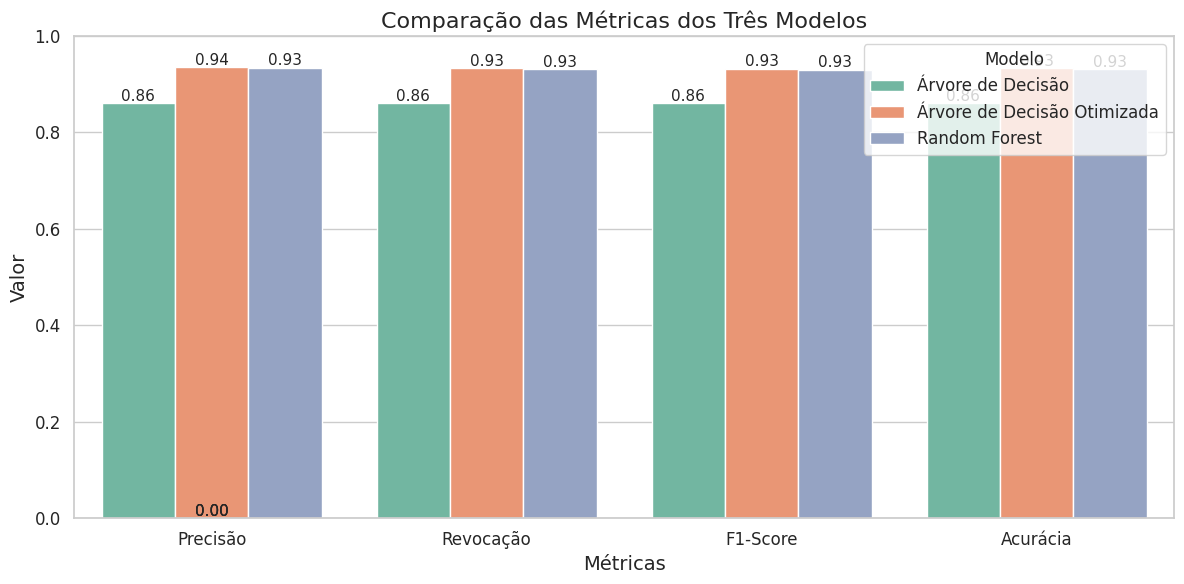

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar o estilo do seaborn
sns.set(style="whitegrid")

# Definir uma paleta de cores
palette = sns.color_palette("Set2", n_colors=3)

# Plotar o gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x='Métrica', y='Valor', hue='Modelo', data=metrics_long_df, palette=palette)

# Adicionar rótulos de valor acima de cada barra
for p in plt.gca().patches:
    plt.text(
        p.get_x() + p.get_width() / 2.,
        p.get_height() + 0.005,
        f'{p.get_height():.2f}',
        ha='center',
        fontsize=11
    )

# Configurar os limites do eixo y
plt.ylim(0, 1)

# Adicionar títulos e rótulos
plt.title('Comparação das Métricas dos Três Modelos', fontsize=16)
plt.xlabel('Métricas', fontsize=14)
plt.ylabel('Valor', fontsize=14)

# Ajustar a legenda
plt.legend(title='Modelo', fontsize=12)

# Ajustar a visualização
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Exibir o gráfico
plt.show()


In [ ]:
scores = {
    "Árvore de Decisão (Original)": {
        "Precisão": precision_dt,
        "Revocação": recall_dt,
        "F1-Score": f1_dt,
        "Acurácia": accuracy_dt
    },
    "Árvore de Decisão (Otimizado)": {
        "Precisão": precision_best,
        "Revocação": recall_best,
        "F1-Score": f1_best,
        "Acurácia": accuracy_best
    },
    "Random Forest": {
        "Precisão": precision_rf,
        "Revocação": recall_rf,
        "F1-Score": f1_rf,
        "Acurácia": accuracy_rf
    }
}


In [ ]:
# Convertendo o dicionário para um DataFrame
df_scores = pd.DataFrame.from_dict(scores, orient='index')

# Exibindo o DataFrame ao usuário
df_scores



,Precisão,Revocação,F1-Score,Acurácia
Árvore de Decisão (Original),0.860695,0.860340,0.860505,0.860340
Árvore de Decisão (Otimizado),0.935349,0.933278,0.932124,0.933278
Random Forest,0.933615,0.931206,0.929926,0.931206
